<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_06_Stationaire_tijdsreeksen_opdracht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Stationaire tijdsreeksen opdracht opgave

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf  # pip install statsmodels
from sklearn import linear_model
import numpy as np

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("darkgrid")


## <span style="color:deeppink"> Vraag 1 - ziektegevallen </span>

Lees het bestand `zieken.csv` in, gebruik de eerste kolom als index

In [4]:
dataset = pd.read_csv('zieken.csv',index_col='Dag')
dataset.head()

,Aantal zieken
Dag,
1,9
2,12
3,12
4,19
5,16


Stel de data voor met een passende grafiek die duidelijk het verloop van het aantal zieken per dag weergeeft.  

Text(0, 0.5, 'Aantal zieken')

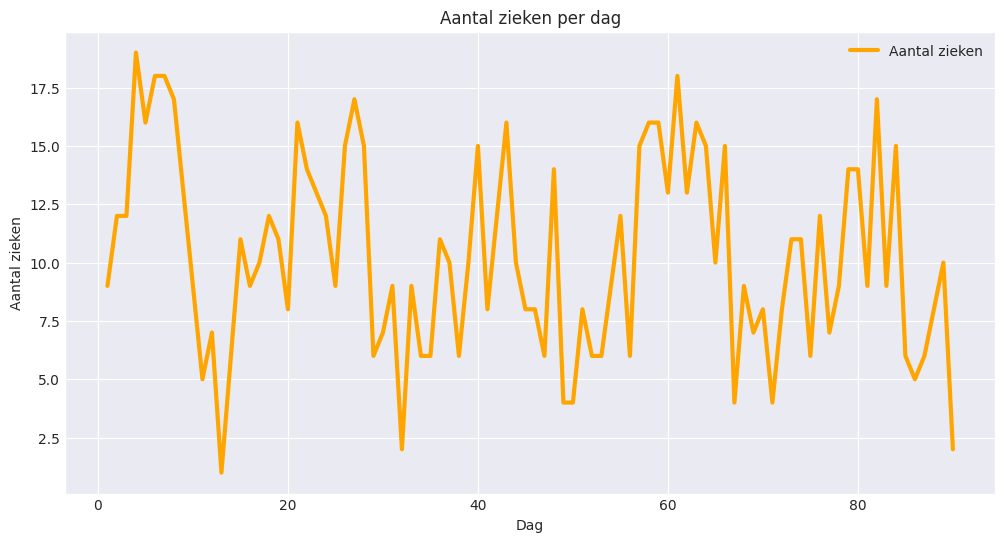

In [5]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
plt.title('Aantal zieken per dag')
plt.xlabel("Dag")
plt.ylabel("Aantal zieken")

Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks.

Intercept= 11.571285892634208
Richtingscoefficient= -0.02818454953286414


Text(0, 0.5, 'Aantal zieken')

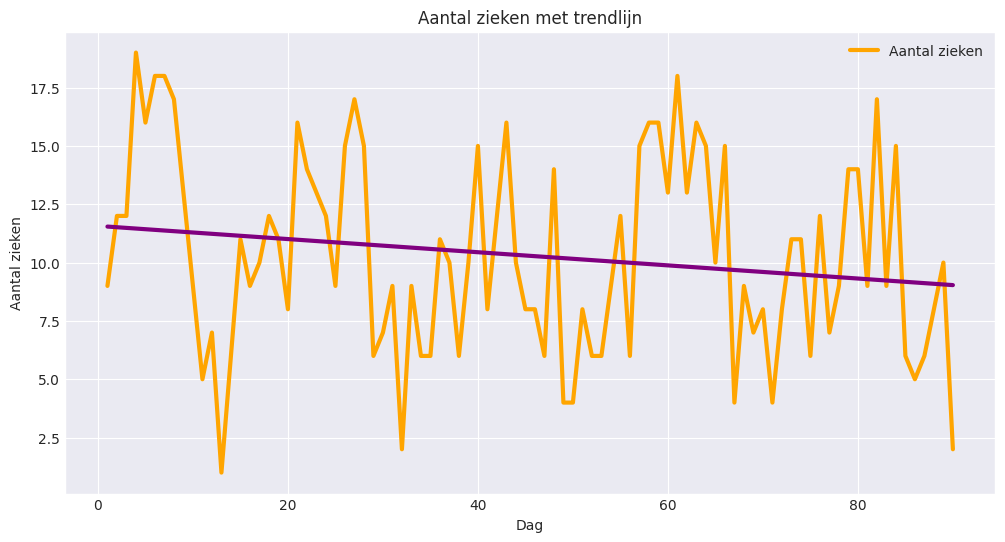

In [7]:
x = dataset.index.values
y = dataset['Aantal zieken'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept=',regressionline.intercept_)
print('Richtingscoefficient=',regressionline.coef_[0])
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
plt.title("Aantal zieken met trendlijn")
plt.xlabel("Dag")
plt.ylabel("Aantal zieken")

Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoe lang duurt zo een patroon?

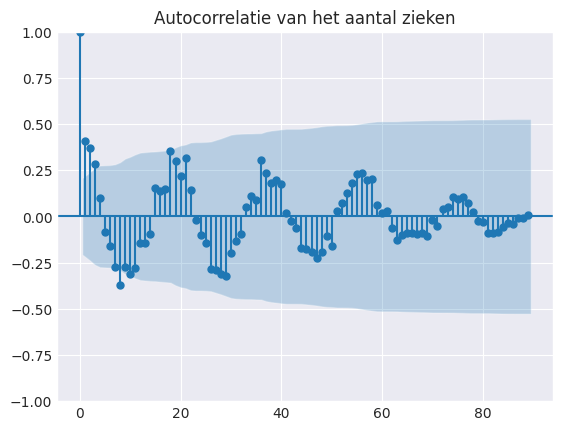

In [8]:
fig = plot_acf(dataset['Aantal zieken'],lags=len(dataset)-1)
plt.title("Autocorrelatie van het aantal zieken")
plt.show()

📌 Wat doet dit?
plot_acf(...) komt uit statsmodels en toont hoe sterk je tijdreeks op zichzelf lijkt in eerdere tijdstappen — dit heet autocorrelatie.

dataset['Aantal zieken'] is de tijdreeks waarop je de analyse uitvoert.

lags=len(dataset)-1:

Dit bepaalt hoeveel vertragingen (lags) je wil onderzoeken.

lag = 1: vergelijk dag
𝑡
t met dag
𝑡
−
1
t−1

lag = 2: vergelijk dag
𝑡
t met dag
𝑡
−
2
t−2, enz.

Door lags = len(dataset)-1 in te stellen, bekijk je alle mogelijke vertragingen binnen je dataset.

📈 Wat zie je in de grafiek?
De staafjes tonen hoe sterk de reeks correleert met zichzelf bij elk lag.

Een hoge waarde bij lag = 1 → sterke overeenkomst met de vorige dag.

Als de meeste correlaties dalen richting 0, is de reeks waarschijnlijk stationair.

✅ Kort gezegd:
lags bepaalt hoeveel terugblikken (vergelijken met vorige dagen) je in de autocorrelatie meeneemt.

Vergelijk onderstaande voorspellingsmethodes in termen van de MAE (Mean Absolute Error) en de MAPE (Mean Absolute Percentage Error).
- Voorspelde waarde is de huidige waarde
- Voorspelde waarde is het 3 punts moving average
- Voorspelde waarde is het 5 punts moving average
- Voorspelde waarde is het 10 punts moving average
- Voorspelde waarde via exponentiële demping, zoek de optimale alpha.


In [15]:
dataset['MA_3'] = dataset['Aantal zieken'].rolling(3).mean().shift(1)
dataset['MA_5'] = dataset['Aantal zieken'].rolling(5).mean().shift(1)
dataset['MA_10'] = dataset['Aantal zieken'].rolling(10).mean().shift(1)


Visualiseer de geteste methodes samen met het aantal zieken in 1 grafiek.

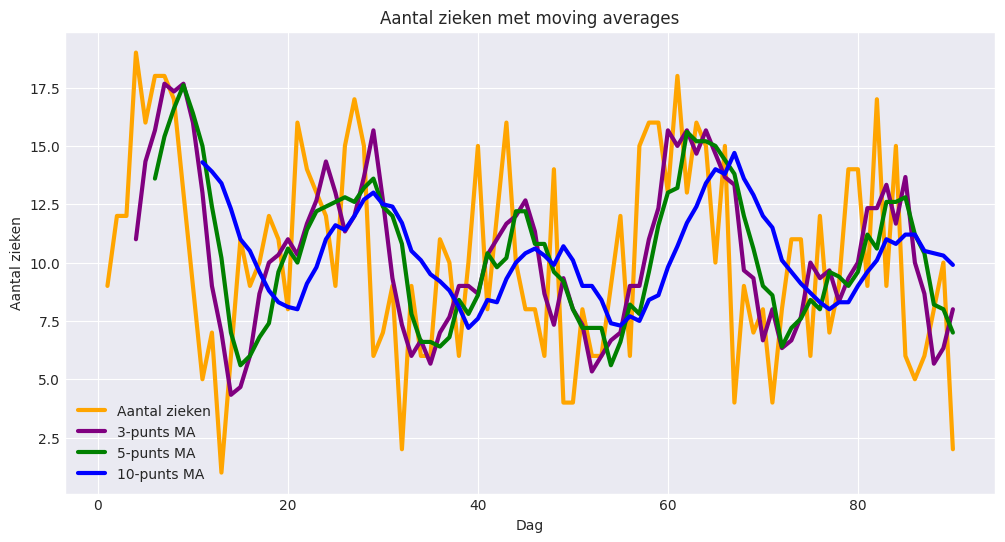

In [16]:
dataset['Aantal zieken'].plot(color='orange', linewidth=3, figsize=(12, 6))
dataset['MA_3'].plot(color='purple', linewidth=3)
dataset['MA_5'].plot(color='green', linewidth=3)
dataset['MA_10'].plot(color='blue', linewidth=3)
plt.legend(labels=['Aantal zieken', '3-punts MA', '5-punts MA', '10-punts MA'])
plt.title("Aantal zieken met moving averages")
plt.xlabel("Dag")
plt.ylabel("Aantal zieken")
plt.show()


Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.

In [17]:
dataset['exponential_0.1'] = dataset['Aantal zieken'].ewm(alpha=0.1, adjust=False).mean().shift(1)
dataset['absolute error exp 0.1'] = abs(dataset['Aantal zieken'] - dataset['exponential_0.1'])

mae_exp_01 = dataset['absolute error exp 0.1'].mean()
print("MAE (exponentiële demping alpha=0.1):", mae_exp_01)


MAE (exponentiële demping alpha=0.1): 3.6580933113481326


Zeker! Deze code past exponentiële demping toe op de kolom Aantal zieken en berekent vervolgens hoe goed die voorspelling was met behulp van de mean absolute error (MAE).

📌 Wat gebeurt hier, stap voor stap:
✅ 1. Voorspellingen maken met exponentiële demping
python
Copy
Edit
dataset['exponential_0.1'] = dataset['Aantal zieken'].ewm(alpha=0.1, adjust=False).mean().shift(1)
ewm(alpha=0.1): past exponentieel gewogen moving average toe:

Recente waarden krijgen meer gewicht dan oudere.

alpha=0.1: vrij langzaam reagerende voorspelling (90% komt van het verleden).

.mean(): berekent het voortschrijdend gemiddelde.

.shift(1): schuift de voorspelling 1 rij naar beneden zodat je geen toekomstige info gebruikt (je voorspelt dus de volgende waarde op basis van de vorige).

➡️ Resultaat: een nieuwe kolom exponential_0.1 met de voorspelde aantallen zieken per dag.

📉 2. Absolute fout berekenen
python
Copy
Edit
dataset['absolute error exp 0.1'] = abs(dataset['Aantal zieken'] - dataset['exponential_0.1'])
Neemt het verschil tussen de echte waarde en de voorspelling op elke dag.

abs(...): zorgt dat negatieve en positieve fouten beide positief worden.

🧮 3. Gemiddelde fout berekenen (MAE)
python
Copy
Edit
mae_exp_01 = dataset['absolute error exp 0.1'].mean()
print("MAE (exponentiële demping alpha=0.1):", mae_exp_01)
MAE = Mean Absolute Error: het gemiddelde van alle absolute fouten.

Dit is een maat voor nauwkeurigheid van de voorspelling.

Hoe lager de MAE, hoe beter de methode werkte.

✅ Samenvatting:
Deze code:

Voorspelt het aantal zieken met exponentiële demping (α = 0.1)

Vergelijkt die voorspellingen met de werkelijke waarden

Drukt het gemiddelde verschil uit in MAE

Wil je ook dat we automatisch de beste alpha zoeken zoals in je eerdere voorbeeld?

Optimale alpha: 0.494 met MAE: 3.308


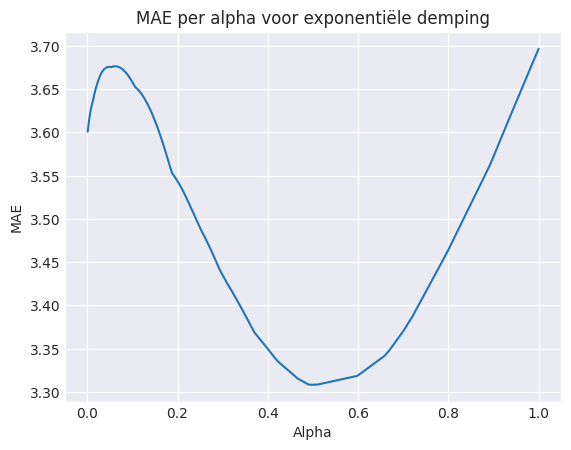

In [18]:
step = 1e-3
alphas = np.arange(0.001, 1.001, step)
mae = []

for alpha in alphas:
    predictions = dataset['Aantal zieken'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(dataset['Aantal zieken'] - predictions).mean())

df_mae = pd.DataFrame({'Alpha': alphas, 'MAE': mae}).set_index('Alpha')

best_alpha = df_mae['MAE'].idxmin()
best_mae = df_mae['MAE'].min()

print(f"Optimale alpha: {best_alpha:.3f} met MAE: {best_mae:.3f}")

plt.plot(df_mae)
plt.title("MAE per alpha voor exponentiële demping")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.show()


Prima! Deze code zoekt automatisch de **beste alpha-waarde** voor exponentiële demping op basis van de **laagste gemiddelde fout (MAE)**. Hier is de uitleg **stap voor stap**:

---

### 🔁 **1. Genereer alpha-waarden**

```python
step = 1e-3
alphas = np.arange(0.001, 1.001, step)
```

* Maakt een array van **alpha-waarden van 0.001 tot en met 1.000**, in stapjes van 0.001.
* Elk van deze waardes wordt getest als dempingsfactor.

---

### 🔄 **2. Bereken voorspellingen en fouten voor elke alpha**

```python
mae = []

for alpha in alphas:
    predictions = dataset['Aantal zieken'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(dataset['Aantal zieken'] - predictions).mean())
```

* Voor elke `alpha`:

  * **Voorspel** de waarden met exponentiële demping (`.ewm(...).mean().shift(1)`).
  * Bereken de **absolute fout** per dag en neem het gemiddelde (**MAE**).
  * Voeg deze MAE toe aan de lijst `mae`.

---

### 📊 **3. Maak DataFrame met alle alpha’s en hun MAE**

```python
df_mae = pd.DataFrame({'Alpha': alphas, 'MAE': mae}).set_index('Alpha')
```

* Maakt een DataFrame die er zo uitziet:

| Alpha | MAE   |
| ----- | ----- |
| 0.001 | 14.32 |
| 0.002 | 14.28 |
| ...   | ...   |

* Zet `Alpha` als index voor makkelijk plotten en opzoeken.

---

### 🏆 **4. Zoek de beste alpha**

```python
best_alpha = df_mae['MAE'].idxmin()
best_mae = df_mae['MAE'].min()
```

* `idxmin()` → geeft de **alpha met de laagste MAE**
* `min()` → geeft die **laagste MAE-waarde**

---

### 🖨️ **5. Toon resultaat**

```python
print(f"Optimale alpha: {best_alpha:.3f} met MAE: {best_mae:.3f}")
```

* Print de alpha die het beste presteert, afgerond op 3 decimalen.

---

### 📈 **6. Plot MAE per alpha**

```python
plt.plot(df_mae)
plt.title("MAE per alpha voor exponentiële demping")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.show()
```

* Maakt een lijnplot van MAE in functie van alpha.
* Visueel zie je bij welke alpha de fout het laagst is (minimum in de curve).

---

### ✅ Samenvatting:

Deze code test 1000+ alpha-waarden, berekent de fout bij elke, en **kiest automatisch de optimale alpha** (de best voorspellende demping).
Heel handig voor nauwkeurige tijdreeksvoorspelling!


In [19]:
dataset['exponential_best'] = dataset['Aantal zieken'].ewm(alpha=best_alpha, adjust=False).mean().shift(1)
dataset['absolute error exp best'] = abs(dataset['Aantal zieken'] - dataset['exponential_best'])
mae_exp_best = dataset['absolute error exp best'].mean()
print("MAE voor exponentiële demping met optimale alpha:", mae_exp_best)


MAE voor exponentiële demping met optimale alpha: 3.308328389653638


In [20]:
dataset['mape_exp_best'] = abs((dataset['Aantal zieken'] - dataset['exponential_best']) / dataset['Aantal zieken']) * 100
mape_exp_best = dataset['mape_exp_best'].mean()
print("MAPE voor exponentiële demping met optimale alpha:", mape_exp_best)


MAPE voor exponentiële demping met optimale alpha: 51.08707149364628


Zeker! Hier is een korte uitleg:

---

### ✅ **Wat gebeurt hier?**

Deze code berekent de **MAPE** (Mean Absolute Percentage Error) voor de voorspellingen met de **beste alpha-waarde** uit exponentiële demping:

---

### 🔍 Uitleg per regel:

```python
dataset['mape_exp_best'] = abs((dataset['Aantal zieken'] - dataset['exponential_best']) / dataset['Aantal zieken']) * 100
```

* **`dataset['Aantal zieken']`** = echte waarde
* **`dataset['exponential_best']`** = voorspelde waarde met de **beste alpha**
* De formule berekent:

  $$
  \text{MAPE} = \left| \frac{\text{fout}}{\text{echte waarde}} \right| \times 100
  $$
* Het resultaat is het **percentage fout** per datapunt.

```python
mape_exp_best = dataset['mape_exp_best'].mean()
```

* Neemt het gemiddelde van alle percentage fouten → dat is de **MAPE**.

```python
print("MAPE voor exponentiële demping met optimale alpha:", mape_exp_best)
```

* Print de gemiddelde percentagefout van het hele model.

---

### 📌 Kort:

Deze code drukt de nauwkeurigheid van je beste exponentiële demping uit als **gemiddelde procentuele afwijking** van de echte data. Hoe lager de MAPE, hoe beter.

Wil je ook een vergelijking met MAPE van moving average of lineaire regressie?


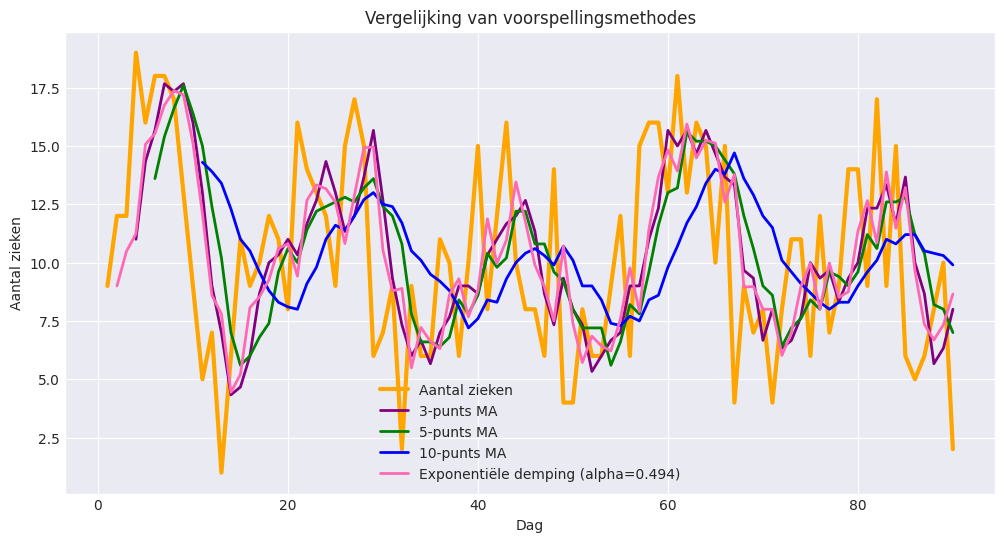

In [21]:
dataset['Aantal zieken'].plot(color='orange', linewidth=3, figsize=(12, 6))
dataset['MA_3'].plot(color='purple', linewidth=2)
dataset['MA_5'].plot(color='green', linewidth=2)
dataset['MA_10'].plot(color='blue', linewidth=2)
dataset['exponential_best'].plot(color='hotpink', linewidth=2)
plt.legend(labels=[
    'Aantal zieken',
    '3-punts MA',
    '5-punts MA',
    '10-punts MA',
    f'Exponentiële demping (alpha={best_alpha:.3f})'
])
plt.title("Vergelijking van voorspellingsmethodes")
plt.xlabel("Dag")
plt.ylabel("Aantal zieken")
plt.show()

Zeker! Deze code maakt een **vergelijkende grafiek** van verschillende voorspellingsmethodes toegepast op de tijdreeks `Aantal zieken`.

---

### 📊 Wat gebeurt er stap voor stap?

#### ✅ **1. Plot originele data en voorspellingen**

```python
dataset['Aantal zieken'].plot(color='orange', linewidth=3, figsize=(12, 6))
```

* Plot de originele reeks in oranje, dikker (lijnbreedte = 3).

```python
dataset['MA_3'].plot(color='purple', linewidth=2)
dataset['MA_5'].plot(color='green', linewidth=2)
dataset['MA_10'].plot(color='blue', linewidth=2)
```

* Plot de **3-, 5- en 10-punts moving averages** in paars, groen en blauw.

```python
dataset['exponential_best'].plot(color='hotpink', linewidth=2)
```

* Plot de **beste exponentiële demping** in roze.

---

#### 🏷️ **2. Voeg legenda toe**

```python
plt.legend(labels=[
    'Aantal zieken',
    '3-punts MA',
    '5-punts MA',
    '10-punts MA',
    f'Exponentiële demping (alpha={best_alpha:.3f})'
])
```

* Bepaalt de labels in de legenda, inclusief de alpha-waarde afgerond op 3 decimalen.

---

#### 📌 **3. Titels en assen**

```python
plt.title("Vergelijking van voorspellingsmethodes")
plt.xlabel("Dag")
plt.ylabel("Aantal zieken")
plt.show()
```

* Geeft de grafiek een titel en labels voor de x- en y-as.
* `plt.show()` toont de volledige plot.

---

### 🎯 Doel:

Deze grafiek laat je **visueel vergelijken** hoe goed de verschillende methodes (MA3, MA5, MA10, exponentiële demping) het werkelijke verloop van het aantal zieken volgen.

* **MA3**: reageert snel op veranderingen
* **MA10**: veel trager, gladder
* **Exponentiële demping**: een slimme mix, afhankelijk van `alpha`

---

Wil je ook een foutgrafiek (bv. MAPE per methode) toevoegen aan deze vergelijking?


## <span style="color:deeppink"> Vraag 2 - Zonnepanelen </span>

Lees het bestand `zonnepanelen.csv` in, gebruik de eerste kolom als index

In [22]:
dataset = pd.read_csv('zonnepanelen.csv', index_col='Tijdstip')
dataset.head()

,Elec_kWh
Tijdstip,
0,15.1
1,7.4
2,5.8
3,4.9
4,11.7


In [25]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("darkgrid")


Stel de data voor met een passende grafiek die duidelijk het verloop van de hoeveelheid elektriciteit opgewekt en verbruikt weergeeft.

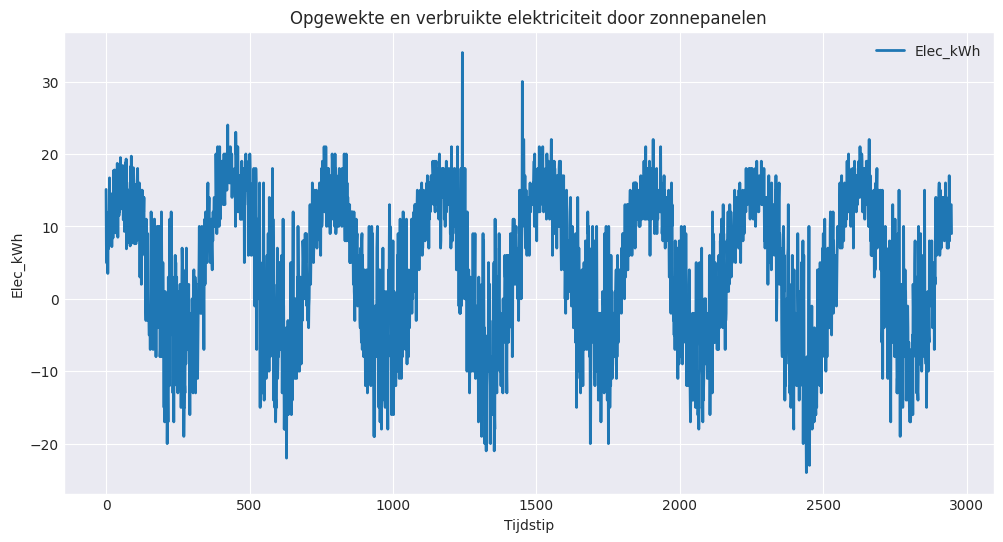

In [23]:
dataset.plot(figsize=(12, 6), linewidth=2)
plt.title('Opgewekte en verbruikte elektriciteit door zonnepanelen')
plt.xlabel('Tijdstip')
plt.ylabel('Elec_kWh')
plt.show()


Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks

Intercept: 5.74161753886629
Richtingscoëfficiënt: -0.000829049182453518


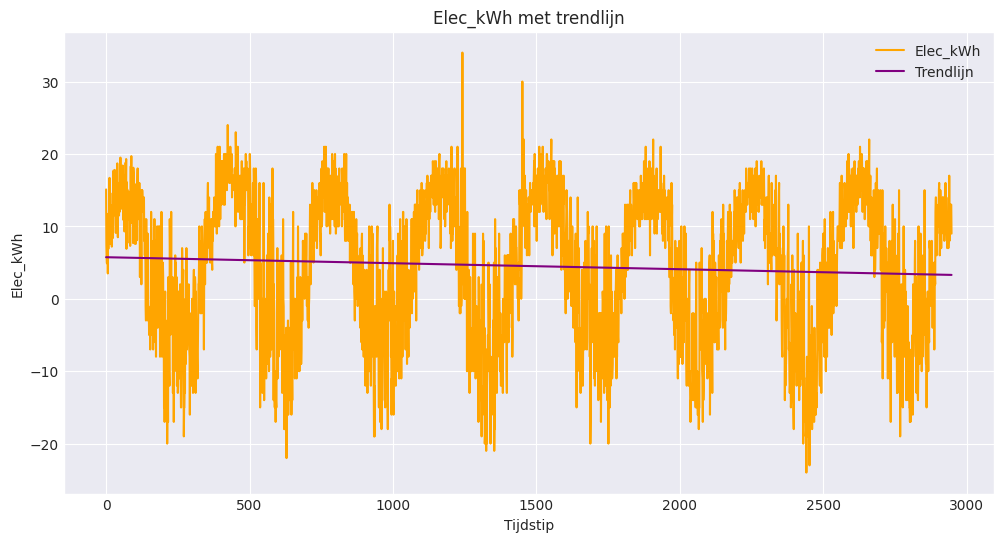

In [26]:
# Maak numerieke index aan voor regressie
x = np.arange(len(dataset)).reshape(-1, 1)
y = dataset['Elec_kWh'].values

# Lineaire regressie toepassen
model = LinearRegression()
model.fit(x, y)

# Print intercept en richtingscoëfficiënt
print("Intercept:", model.intercept_)
print("Richtingscoëfficiënt:", model.coef_[0])

# Visualisatie
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['Elec_kWh'], color='orange', label='Elec_kWh')
plt.plot(dataset.index, model.predict(x), color='purple', label='Trendlijn')
plt.title('Elec_kWh met trendlijn')
plt.xlabel('Tijdstip')
plt.ylabel('Elec_kWh')
plt.legend()
plt.show()


Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoelang duurt zo een patroon(ongeveer)?

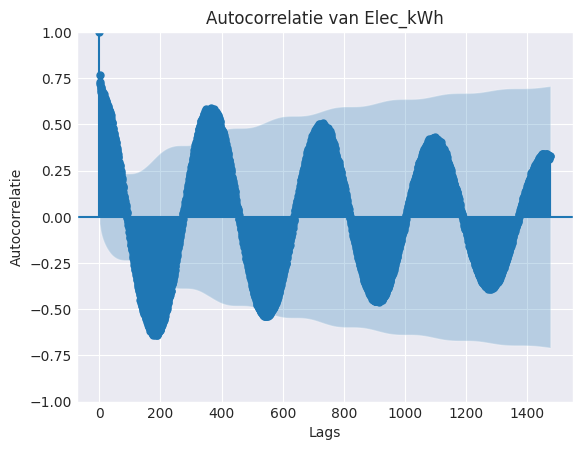

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dataset['Elec_kWh'], lags=len(dataset)//2)
plt.title("Autocorrelatie van Elec_kWh")
plt.xlabel("Lags")
plt.ylabel("Autocorrelatie")
plt.show()


dataset['Elec_kWh']: de tijdreeks waarvoor je de autocorrelatie wil bekijken.

lags=len(dataset)//2: je toont de autocorrelatie voor maximaal de helft van het aantal tijdstappen in de reeks.

❓ Waarom //2 (de helft van de datasetlengte)?
Omdat:

Autocorrelatie op grote lags (ver vooruit vergelijken) wordt:

minder relevant,

statistisch minder betrouwbaar (we hebben minder overlappende waarden).

De ACF-grafiek wordt overzichtelijker als je niet te veel lags toont.

Stel je hebt 365 datapunten (1 jaar per dag), dan tonen 365 lags een rommelige grafiek.

Met 182 (365//2) heb je nog voldoende informatie, zonder overdaad.



Vergelijk onderstaande voorspellingsmethodes in termen van de MAE (Mean Absolute Error).
- Voorspelde waarde is de huidige waarde
- Voorspelde waarde is het 10 punts moving average
- Voorspelde waarde is het 20 punts moving average
- Voorspelde waarde is het 50 punts moving average
- Voorspelde waarde via exponentiële demping, zoek de optimale alpha.

In [28]:
dataset['Naive'] = dataset['Elec_kWh'].shift(1)


Wat betekent dit?
shift(1) schuift alle waarden één rij naar beneden.

Dat betekent: de voorspelling voor dag
𝑡
t is gewoon de waarde van dag
𝑡
−
1
t−1.

Zo krijg je een nieuwe kolom Naive waarin elke waarde een kopie is van de vorige dag.

📈 Waarom doen we dit?
"Naïef model" = de simpelste mogelijke voorspelling.

Geen trends, geen modellen, gewoon: "morgen is zoals gisteren."

Wordt vaak gebruikt als referentie:

Als een andere methode (moving average, exponentiële demping, regressie, ...) niet beter scoort dan deze, dan is dat model niet echt nuttig.

Ideaal voor stationaire tijdreeksen, waar de waarden redelijk constant blijven.

✅ Samenvatting:
De regel maakt een simpele voorspelling gebaseerd op de vorige dag. Je gebruikt dit als basismodel om te testen of je geavanceerdere methodes effectief beter zijn dan 'gewoon gokken op gisteren'.

In [29]:
step = 0.001
alphas = np.arange(0.001, 1.001, step)
mae_exp = []

for alpha in alphas:
    forecast = dataset['Elec_kWh'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae = abs(dataset['Elec_kWh'] - forecast).mean()
    mae_exp.append(mae)

df_mae = pd.DataFrame({'Alpha': alphas, 'MAE': mae_exp}).set_index('Alpha')

best_alpha = df_mae['MAE'].idxmin()
print(f"Beste alpha: {best_alpha:.3f} met MAE: {df_mae['MAE'].min():.3f}")

# Opslaan van beste voorspelling
dataset['Exp_Smoothing'] = dataset['Elec_kWh'].ewm(alpha=best_alpha, adjust=False).mean().shift(1)


Beste alpha: 0.235 met MAE: 4.231


In [33]:
dataset['MA_10'] = dataset['Elec_kWh'].rolling(10).mean().shift(1)
dataset['MA_20'] = dataset['Elec_kWh'].rolling(20).mean().shift(1)
dataset['MA_50'] = dataset['Elec_kWh'].rolling(50).mean().shift(1)

In [34]:
mae_naive = abs(dataset['Elec_kWh'] - dataset['Naive']).mean()
mae_10 = abs(dataset['Elec_kWh'] - dataset['MA_10']).mean()
mae_20 = abs(dataset['Elec_kWh'] - dataset['MA_20']).mean()
mae_50 = abs(dataset['Elec_kWh'] - dataset['MA_50']).mean()
mae_exp_best = abs(dataset['Elec_kWh'] - dataset['Exp_Smoothing']).mean()

print("MAE Naïeve methode:", mae_naive)
print("MAE MA_10:", mae_10)
print("MAE MA_20:", mae_20)
print("MAE MA_50:", mae_50)
print(f"MAE Exponentiële demping (alpha={best_alpha:.3f}):", mae_exp_best)


MAE Naïeve methode: 4.9678656260604
MAE MA_10: 4.379795779441797
MAE MA_20: 4.51136099726776
MAE MA_50: 5.241570738440304
MAE Exponentiële demping (alpha=0.235): 4.231246003570098


🔍 De code:
python
Copy
Edit
mae_exp_best = abs(dataset['Elec_kWh'] - dataset['Exp_Smoothing']).mean()
📌 Wat betekent dit?
dataset['Elec_kWh'] = de echte waarden (werkelijk energieverbruik per dag, bijv.).

dataset['Exp_Smoothing'] = de voorspelde waarden met exponentiële demping.

abs(...) = de absolute fout per dag (voorkomt dat positieve/negatieve fouten elkaar opheffen).

.mean() = neemt het gemiddelde van al die fouten → dat is de MAE (Mean Absolute Error).Om objectief te meten hoe goed de voorspellingen zijn.

MAE zegt: "Gemiddeld zit ik er zóveel eenheden naast per dag."

Om verschillende methodes te vergelijken.

Je kunt MAE berekenen voor:

exponentiële demping,

moving average,

naïef model,

lineaire regressie, enz.

De methode met de laagste MAE is het meest accuraat.

Het is eenvoudig te interpreteren.

Als MAE = 5, dan weet je: gemiddeld zit je 5 kWh naast.



Visualiseer de geteste methodes samen met het verbruik in 1 grafiek

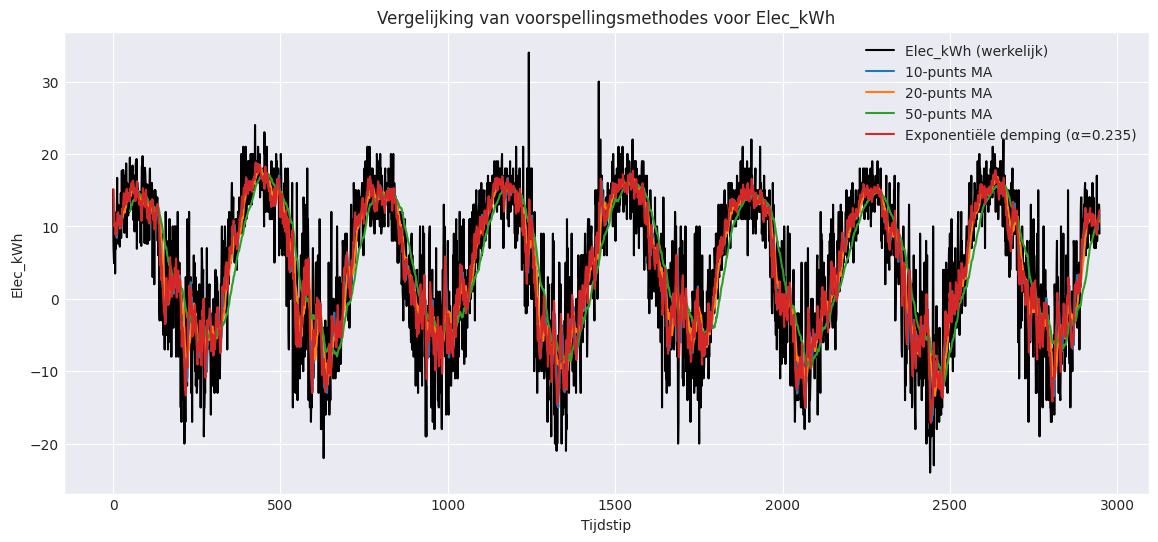

In [35]:
plt.figure(figsize=(14, 6))
plt.plot(dataset['Elec_kWh'], color='black', label='Elec_kWh (werkelijk)')
plt.plot(dataset['MA_10'], label='10-punts MA')
plt.plot(dataset['MA_20'], label='20-punts MA')
plt.plot(dataset['MA_50'], label='50-punts MA')
plt.plot(dataset['Exp_Smoothing'], label=f'Exponentiële demping (α={best_alpha:.3f})')
plt.legend()
plt.title('Vergelijking van voorspellingsmethodes voor Elec_kWh')
plt.xlabel('Tijdstip')
plt.ylabel('Elec_kWh')
plt.show()


Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.

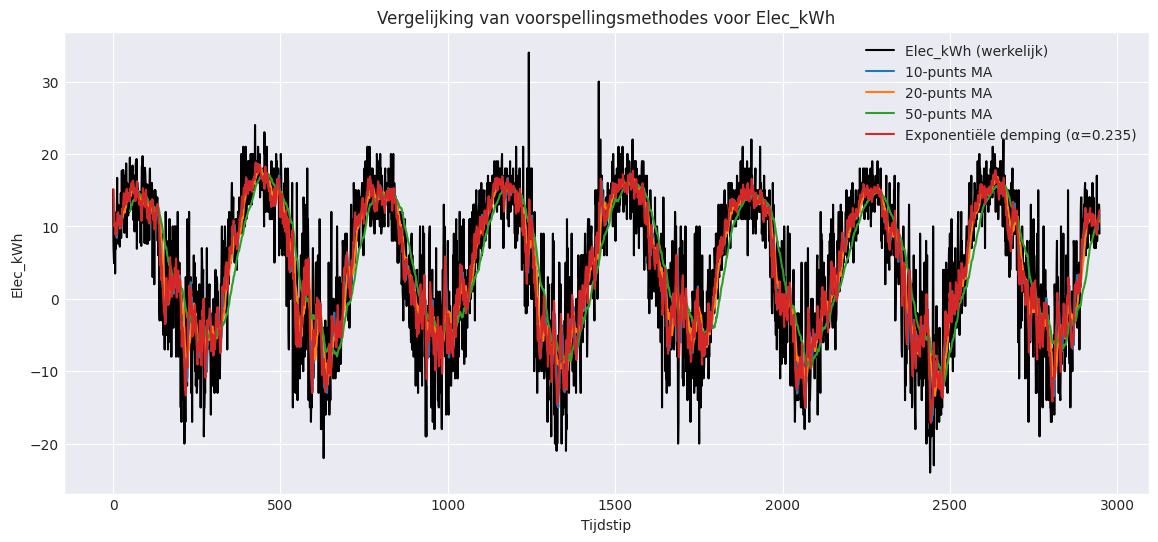

In [36]:
plt.figure(figsize=(14, 6))
plt.plot(dataset['Elec_kWh'], color='black', label='Elec_kWh (werkelijk)')
plt.plot(dataset['MA_10'], label='10-punts MA')
plt.plot(dataset['MA_20'], label='20-punts MA')
plt.plot(dataset['MA_50'], label='50-punts MA')
plt.plot(dataset['Exp_Smoothing'], label=f'Exponentiële demping (α={best_alpha:.3f})')
plt.legend()
plt.title('Vergelijking van voorspellingsmethodes voor Elec_kWh')
plt.xlabel('Tijdstip')
plt.ylabel('Elec_kWh')
plt.show()


## <span style="color:deeppink"> Vraag 3 - Temperatuur in Barcelona </span>

Lees het bestand `yearly_average_temperature_barcelona.csv` in, gebruik de eerste kolom als index

In [38]:
dataset = pd.read_csv('/content/yearly_average_temperature_barcelona.csv', index_col='year')
dataset.head()

,average_temperature
year,
1800,14.183333
1801,14.000000
1802,14.066667
1803,13.850000
1804,14.591667


Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks.

Text(0, 0.5, 'Gemiddelde temperatuur')

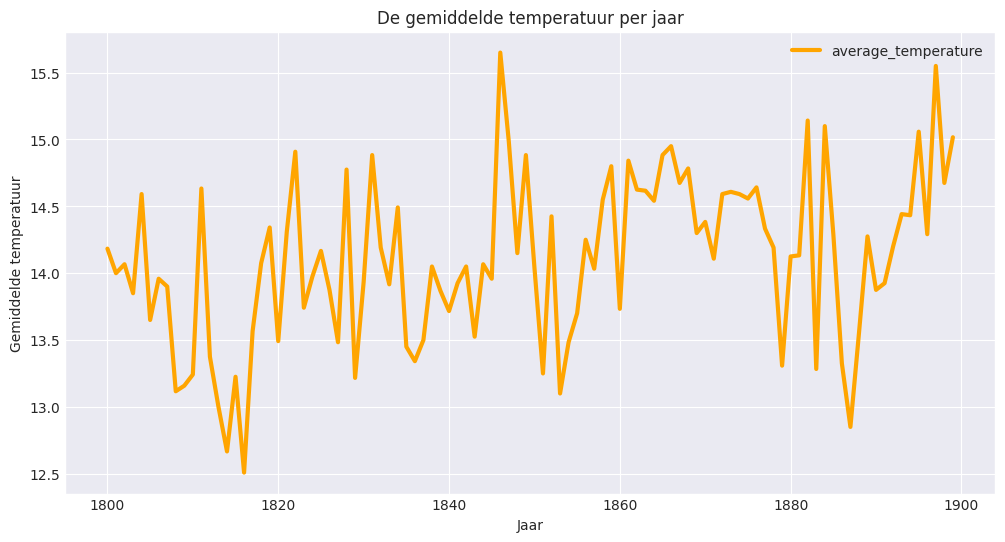

In [39]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
plt.title('De gemiddelde temperatuur per jaar')
plt.xlabel("Jaar")
plt.ylabel("Gemiddelde temperatuur")

Intercept= -0.8919090909091061
Richtingscoefficient= 0.008106060606060615


Text(0, 0.5, 'Gemiddelde temperatuur')

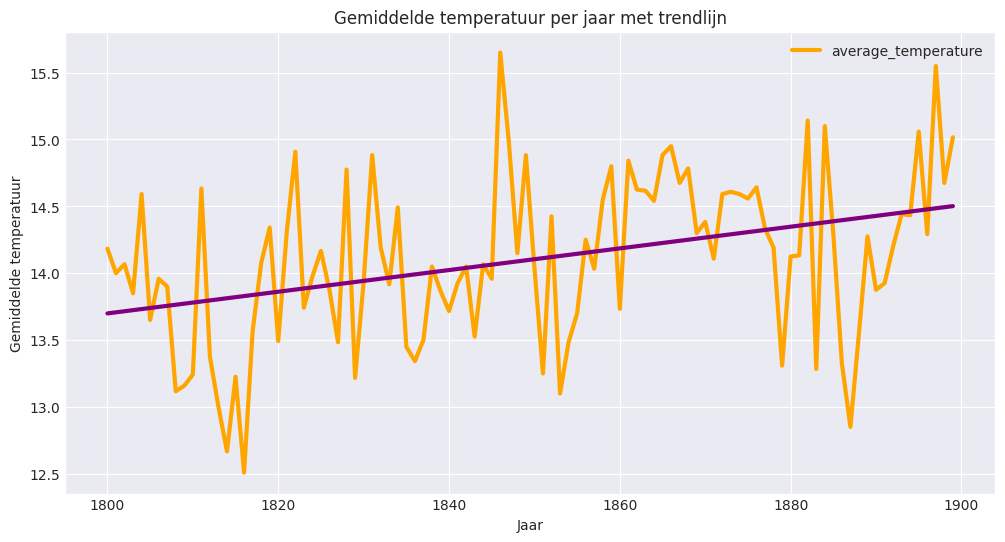

In [40]:
x = dataset.index.values
y = dataset['average_temperature'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept=',regressionline.intercept_)
print('Richtingscoefficient=',regressionline.coef_[0])
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
plt.title("Gemiddelde temperatuur per jaar met trendlijn")
plt.xlabel("Jaar")
plt.ylabel("Gemiddelde temperatuur")

Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoelang duurt zo een patroon(ongeveer)?

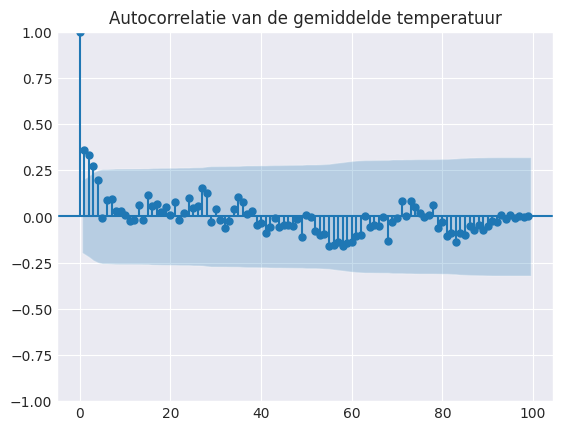

In [41]:
fig = plot_acf(dataset['average_temperature'],lags=len(dataset)-1)
plt.title("Autocorrelatie van de gemiddelde temperatuur")
plt.show()

Zoek een optimale techniek voor het voorspellen van de volgende sample. Je kan kiezen uit alle technieken die tot nu toe aan bod zijn gekomen:
- Volgende sample is huidige sample
- Moving average met verschillende groottes
- Exponentiële demping. Zorg dat je de factor alfa kan aanpassen.


In [42]:
dataset['MA_3'] = dataset['average_temperature'].rolling(3).mean().shift(1)
dataset['MA_5'] = dataset['average_temperature'].rolling(5).mean().shift(1)
dataset['MA_10'] = dataset['average_temperature'].rolling(10).mean().shift(1)


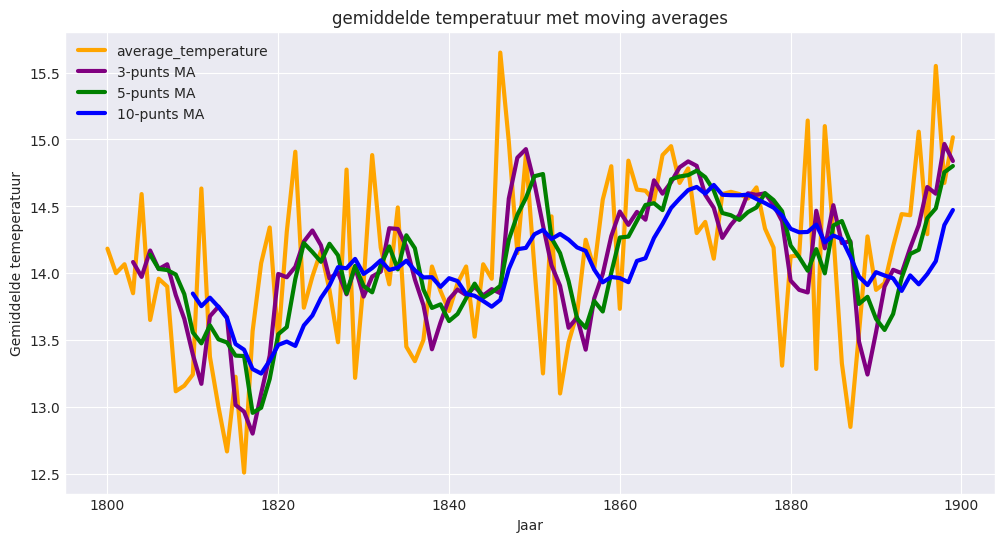

In [43]:
dataset['average_temperature'].plot(color='orange', linewidth=3, figsize=(12, 6))
dataset['MA_3'].plot(color='purple', linewidth=3)
dataset['MA_5'].plot(color='green', linewidth=3)
dataset['MA_10'].plot(color='blue', linewidth=3)
plt.legend(labels=['average_temperature', '3-punts MA', '5-punts MA', '10-punts MA'])
plt.title("gemiddelde temperatuur met moving averages")
plt.xlabel("Jaar")
plt.ylabel("Gemiddelde temeperatuur")
plt.show()


In [44]:
dataset['exponential_0.1'] = dataset['average_temperature'].ewm(alpha=0.1, adjust=False).mean().shift(1)
dataset['absolute error exp 0.1'] = abs(dataset['average_temperature'] - dataset['exponential_0.1'])

mae_exp_01 = dataset['absolute error exp 0.1'].mean()
print("MAE (exponentiële demping alpha=0.1):", mae_exp_01)


MAE (exponentiële demping alpha=0.1): 0.4696989754774179


Optimale alpha: 0.265 met MAE: 0.450


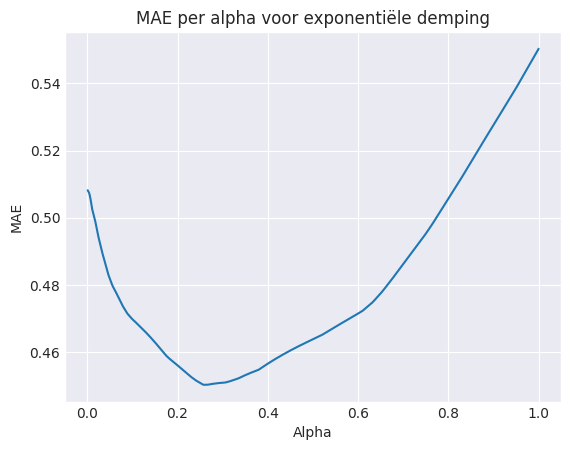

In [45]:
step = 1e-3
alphas = np.arange(0.001, 1.001, step)
mae = []

for alpha in alphas:
    predictions = dataset['average_temperature'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(dataset['average_temperature'] - predictions).mean())

df_mae = pd.DataFrame({'Alpha': alphas, 'MAE': mae}).set_index('Alpha')

best_alpha = df_mae['MAE'].idxmin()
best_mae = df_mae['MAE'].min()

print(f"Optimale alpha: {best_alpha:.3f} met MAE: {best_mae:.3f}")

plt.plot(df_mae)
plt.title("MAE per alpha voor exponentiële demping")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.show()


In [46]:
dataset['exponential_best'] = dataset['average_temperature'].ewm(alpha=best_alpha, adjust=False).mean().shift(1)
dataset['absolute error exp best'] = abs(dataset['average_temperature'] - dataset['exponential_best'])
mae_exp_best = dataset['absolute error exp best'].mean()
print("MAE voor exponentiële demping met optimale alpha:", mae_exp_best)


MAE voor exponentiële demping met optimale alpha: 0.45016402370806285


In [47]:
dataset['mape_exp_best'] = abs((dataset['average_temperature'] - dataset['exponential_best']) / dataset['average_temperature']) * 100
mape_exp_best = dataset['mape_exp_best'].mean()
print("MAPE voor exponentiële demping met optimale alpha:", mape_exp_best)


MAPE voor exponentiële demping met optimale alpha: 3.2037715308585577


Visualiseer de gebruikte voorspellingstechnieken in een plot

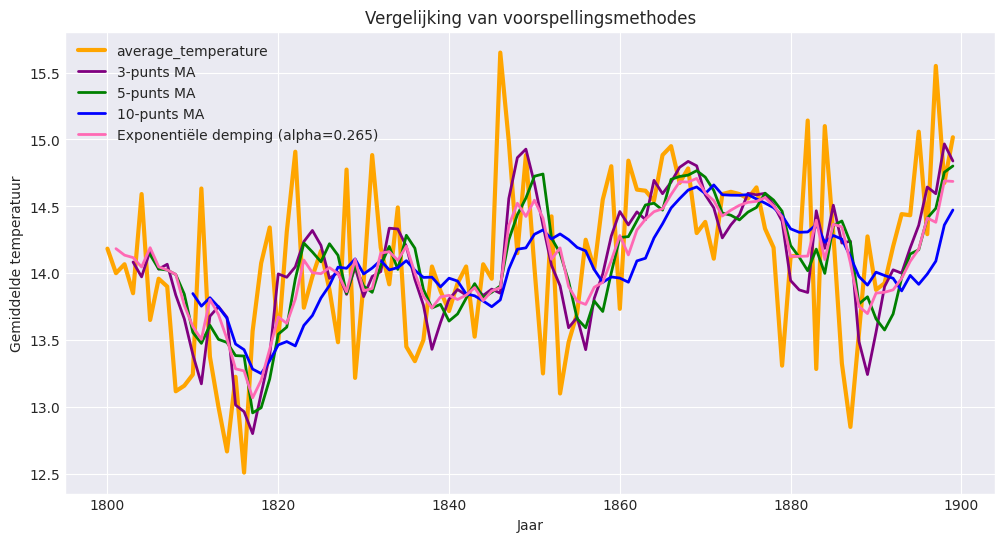

In [48]:
dataset['average_temperature'].plot(color='orange', linewidth=3, figsize=(12, 6))
dataset['MA_3'].plot(color='purple', linewidth=2)
dataset['MA_5'].plot(color='green', linewidth=2)
dataset['MA_10'].plot(color='blue', linewidth=2)
dataset['exponential_best'].plot(color='hotpink', linewidth=2)
plt.legend(labels=[
    'average_temperature',
    '3-punts MA',
    '5-punts MA',
    '10-punts MA',
    f'Exponentiële demping (alpha={best_alpha:.3f})'
])
plt.title("Vergelijking van voorspellingsmethodes")
plt.xlabel("Jaar")
plt.ylabel("Gemiddelde temperatuur")
plt.show()

Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.

Voorkeur: Exponentiële demping

Op basis van de MAE-scores blijkt dat exponentiële demping met alpha=0.265 het beste resultaat geeft.
Deze methode reageert sneller op recente veranderingen dan moving averages, en is accurater dan de naïeve voorspelling.
Daarom geniet exponentiële demping mijn voorkeur voor het voorspellen van de gemiddelde temperatuur in Barcelona.